In [95]:
import pandas as pd
import numpy as np

In [96]:
data=pd.read_csv('/content/Infosys_Stock_Data.csv')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2004-01-01,58.014309,88.067970,88.356247,87.234375,87.46875,11811200
1,2004-01-02,58.327709,88.543747,89.218750,87.750000,88.28125,17143168
2,2004-01-05,60.591110,91.979691,92.890625,88.750000,89.84375,24806720
3,2004-01-06,58.515057,88.828125,93.906250,88.005470,92.96875,24549504
4,2004-01-07,58.599449,88.956253,90.578125,87.394531,89.81250,38803008


In [97]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5172 non-null   datetime64[ns]
 1   Adj Close  5172 non-null   float64       
 2   Close      5172 non-null   float64       
 3   High       5172 non-null   float64       
 4   Low        5172 non-null   float64       
 5   Open       5172 non-null   float64       
 6   Volume     5172 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 283.0 KB


In [ ]:
data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,5172,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5.172000e+03
mean,2014-06-01 16:55:41.067285248,528.957690,611.764049,618.264322,605.251606,611.850435,1.053854e+07
min,2004-01-01 00:00:00,46.511494,70.606247,76.859375,64.454689,74.000778,0.000000e+00
25%,2009-03-03 18:00:00,178.649105,258.035950,261.414062,254.556248,258.093750,5.746938e+06
50%,2014-05-29 12:00:00,332.007477,438.106262,443.084366,433.665634,437.500000,8.072775e+06
75%,2019-09-03 06:00:00,633.060486,729.937515,736.250015,723.687515,729.925018,1.242063e+07
max,2024-11-26 00:00:00,1945.943237,1968.099976,1991.449951,1951.750000,1967.000000,1.663204e+08
std,NaN,494.338879,497.873041,502.224328,493.502018,497.916936,8.692758e+06


In [ ]:
data.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
data.duplicated().sum()

0

In [98]:
df=data.reset_index()['Close']

In [5]:
df.shape

(5172,)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

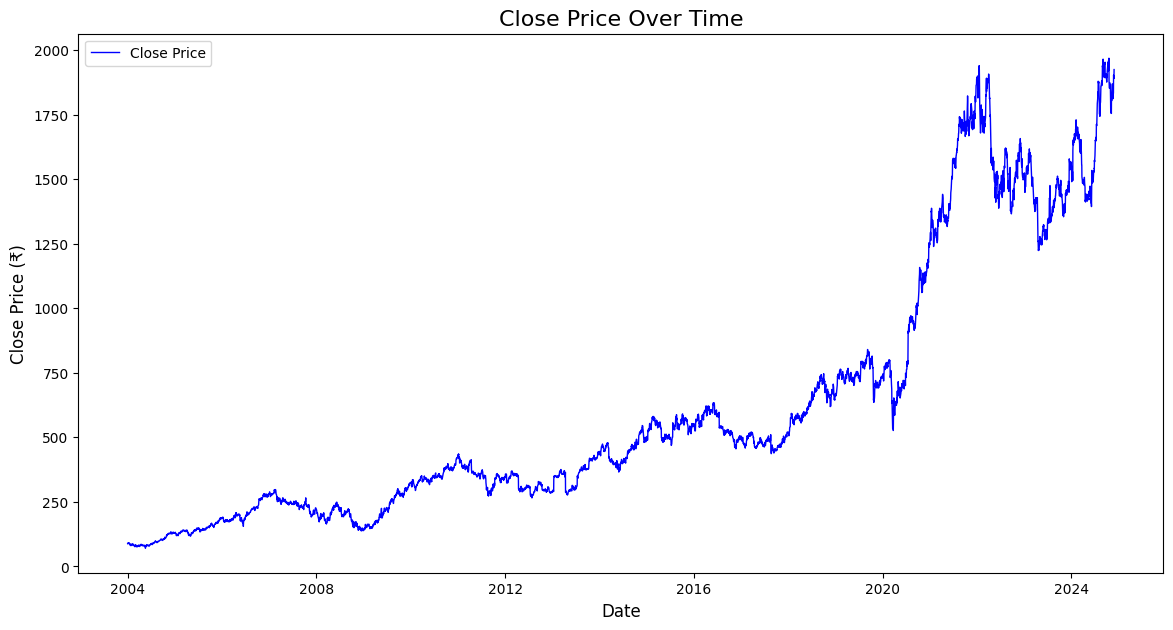

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', linewidth=1)
plt.title('Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (₹)', fontsize=12)
plt.legend()
plt.show()

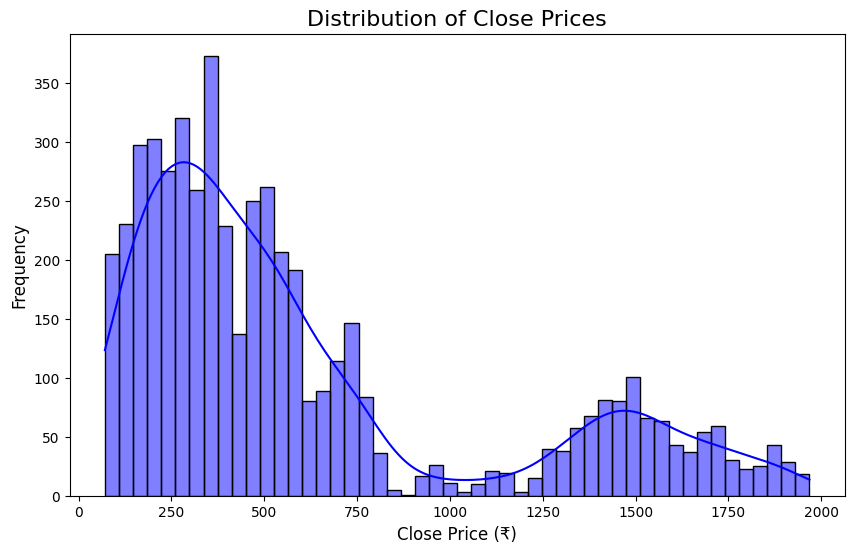

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Close Prices', fontsize=16)
plt.xlabel('Close Price (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

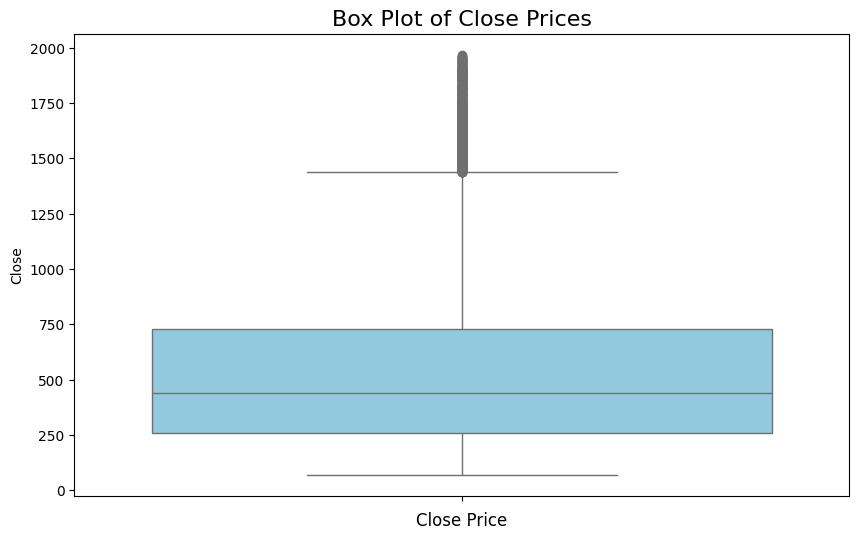

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Close'], color='skyblue')
plt.title('Box Plot of Close Prices', fontsize=16)
plt.xlabel('Close Price', fontsize=12)
plt.show()

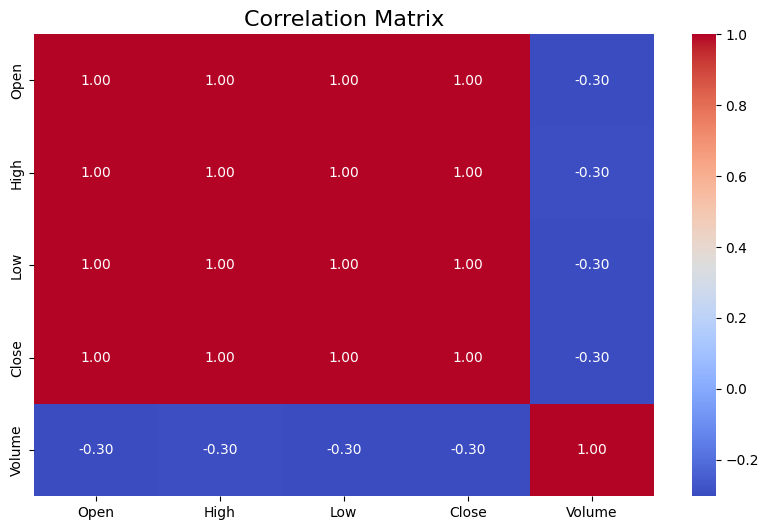

In [ ]:
#Correlation Analysis
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
#Calculating Moving Averages

data['SMA_20'] = data['Close'].rolling(window=20).mean()   #20-day Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()   #50-day Simple Moving Average
data['SMA_100'] = data['Close'].rolling(window=100).mean() #100-day Simple Moving Average


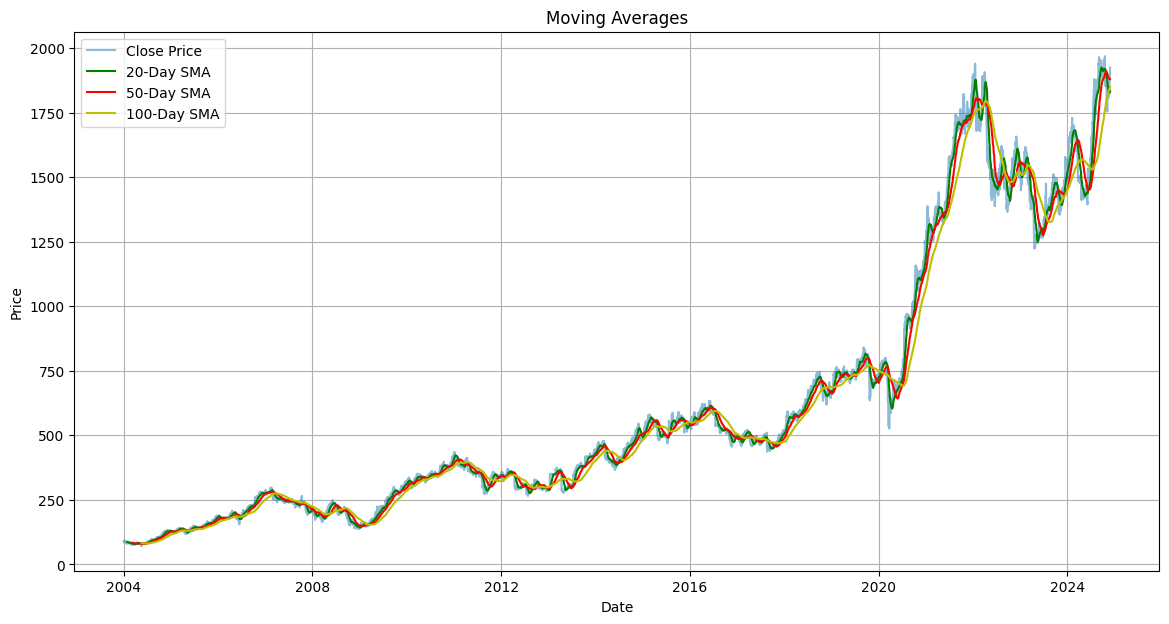

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='red')
plt.plot(data['Date'], data['SMA_100'], label='100-Day SMA', color='y')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [100]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# **LSTM**

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(df).reshape(-1,1))

In [102]:
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [103]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [104]:
seq_length = 50
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [105]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import math
from sklearn.metrics import mean_squared_error

In [107]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 1.8570e-04 - val_loss: 6.5356e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 1.3837e-04 - val_loss: 5.8047e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1.4514e-04 - val_loss: 4.2944e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 1.2856e-04 - val_loss: 0.0015
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 1.4522e-04 - val_loss: 6.9808e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 1.3383e-04 - val_loss: 0.0012
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 1.2476e-04 - val_loss: 7.0990e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 1.2777e-04 - val_loss: 3.5871e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1.2504e-04 - val_loss: 9.7428e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 1.1305e-04 - val_loss: 3.8560e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step

In [112]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [113]:
rmse = math.sqrt(mean_squared_error(y_test_unscaled, predictions))
print(f"RMSE: {rmse}")

RMSE: 61.80571728070815


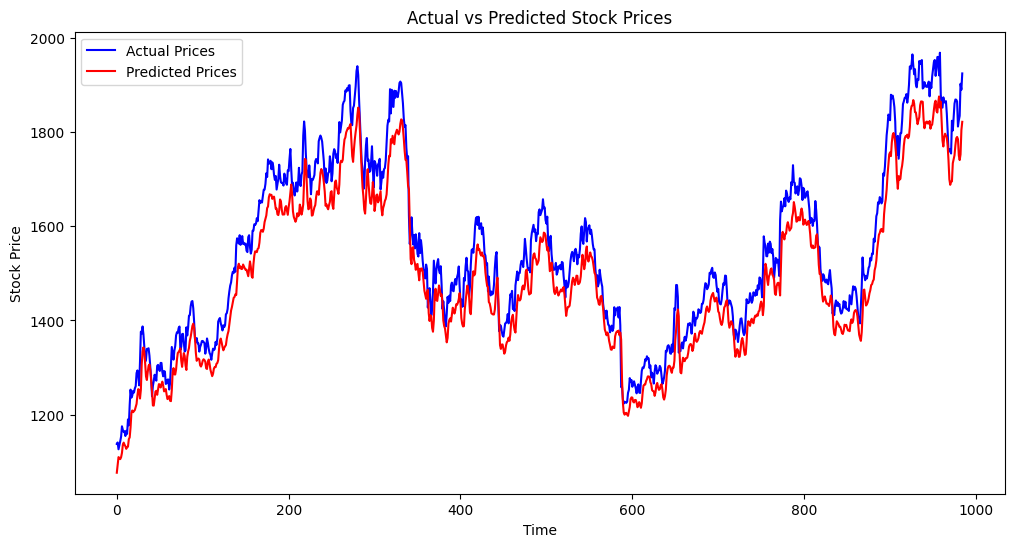

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# **PROPHET**

In [115]:
prophet_data = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [116]:
from prophet import Prophet

In [117]:
prophet_model = Prophet()
prophet_model.fit(prophet_data[:train_size])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvcnn0rr/6bol3cnz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvcnn0rr/hz1vcxc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32623', 'data', 'file=/tmp/tmprvcnn0rr/6bol3cnz.json', 'init=/tmp/tmprvcnn0rr/hz1vcxc8.json', 'output', 'file=/tmp/tmprvcnn0rr/prophet_modelkzcnlq96/prophet_model-20241206091623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [118]:
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)

In [119]:
prophet_rmse = np.sqrt(mean_squared_error(test, forecast['yhat'][-len(test):]))
print(f'Prophet RMSE: {prophet_rmse}')

Prophet RMSE: 572.3762069887296


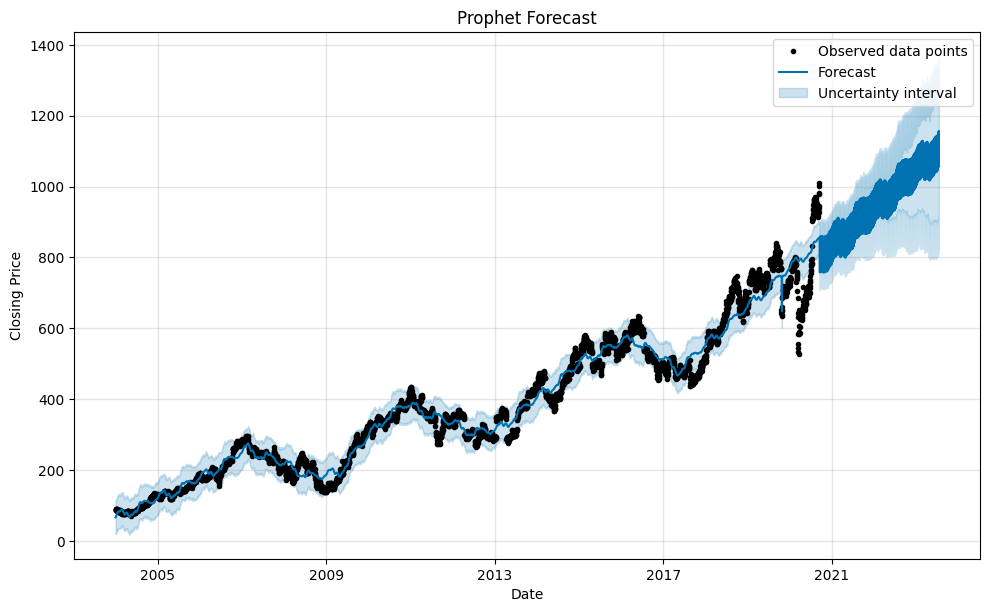

In [120]:
prophet_model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# **ARIMA**

In [121]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [122]:
def check_stationarity(df):
    result = adfuller(df)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is NOT stationary.")

check_stationarity(df)

ADF Statistic: 0.902974626794863
p-value: 0.9931290234792691
Critical Values: {'1%': -3.431623121113447, '5%': -2.862102585213433, '10%': -2.5670694642156837}
The time series is NOT stationary.


In [124]:
diff_series = df.diff().dropna()
check_stationarity(diff_series)

ADF Statistic: -13.687516363225237
p-value: 1.3634918907386599e-25
Critical Values: {'1%': -3.431623121113447, '5%': -2.862102585213433, '10%': -2.5670694642156837}
The time series is stationary.


In [60]:
!pip install pmdarima
from pmdarima import auto_arima

In [125]:
stepwise_fit = auto_arima(diff_series, seasonal=False, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=40875.518, Time=2.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40880.674, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=40876.781, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=40876.543, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=40878.667, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=40878.702, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=40876.499, Time=6.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=40876.532, Time=3.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=40871.547, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=40876.672, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=40876.704, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=40869.547, Time=3.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40874.696, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=40874.933, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0

In [126]:
train = diff_series[:int(0.8 * len(df))]
test = diff_series[int(0.8 * len(df)):]

In [127]:
model = ARIMA(train, order=stepwise_fit.order)
arima_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [128]:
forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [129]:
arima_rmse = np.sqrt(mean_squared_error(test,forecast))
print(f'ARIMA RMSE : {arima_rmse}')

ARIMA RMSE : 23.332910285375206


In [130]:
forecast_index = test.index

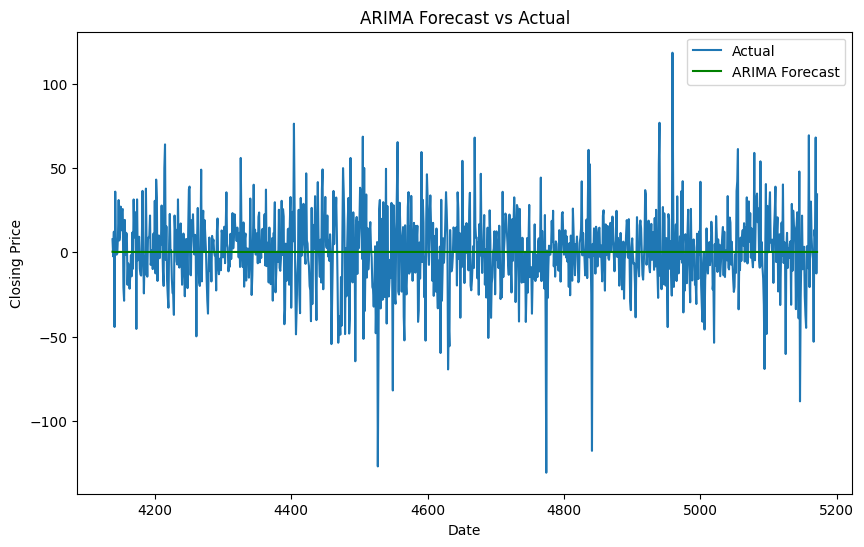

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# **SARIMA**

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [134]:
def test_stationarity(timeseries):
    adf_test = adfuller(timeseries)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    if adf_test[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

In [135]:
test_stationarity(df)

ADF Statistic: 0.902974626794863
p-value: 0.9931290234792691
The data is not stationary.


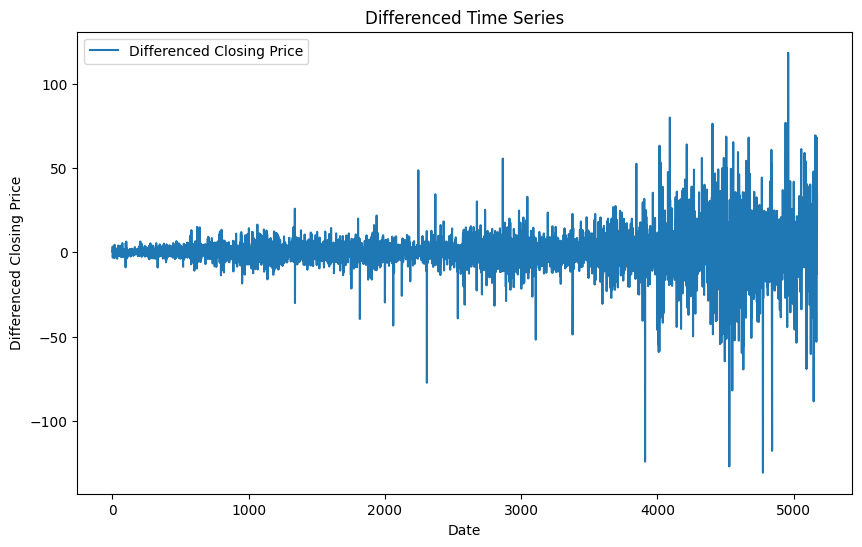

In [139]:
if adfuller(df)[1] > 0.05:  # If p-value > 0.05, apply differencing
    df_diff = df.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(df_diff, label='Differenced Closing Price')
    plt.title('Differenced Time Series')
    plt.xlabel('Date')
    plt.ylabel('Differenced Closing Price')
    plt.legend()
    plt.show()

In [142]:
test_stationarity(df_diff)

ADF Statistic: -13.687516363225237
p-value: 1.3634918907386599e-25
The data is stationary.


In [147]:
p, d, q = 1, 1, 1  # ARIMA parameters
P, D, Q, s = 1, 1, 1, 12 # Seasonal parameters

In [151]:
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [152]:
sarima_forecast = sarima_result.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [153]:
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f'SARIMA RMSE: {sarima_rmse}')

SARIMA RMSE: 23.337941138607935


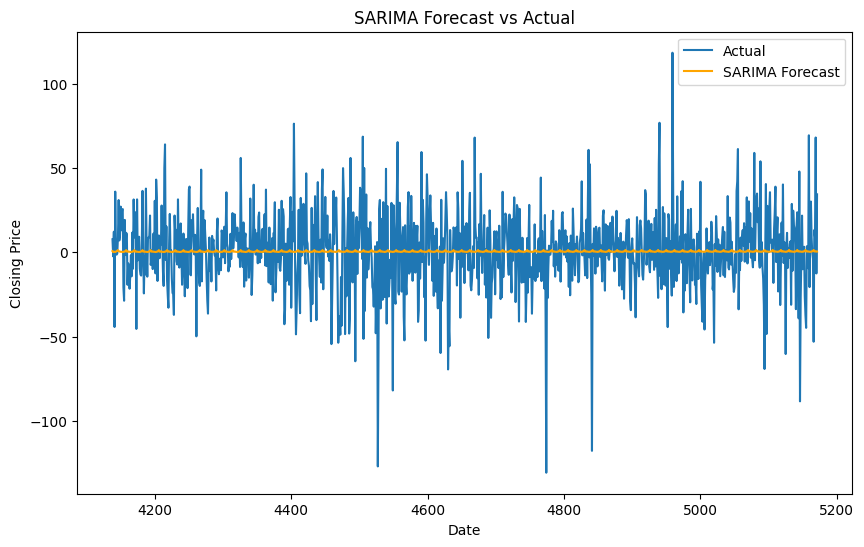

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='orange')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [155]:
models_rmse = {
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'Prophet': prophet_rmse,
    'RMSE': rmse
}

best_model = min(models_rmse, key=models_rmse.get)
print(f'The best model is: {best_model} with RMSE = {models_rmse[best_model]:.2f}')

The best model is: ARIMA with RMSE = 23.33
